In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
microViz version 0.12.7 - Copyright (C) 2021-2025 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For cita

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))


meta$Combo<-factor(meta$Combo, 
                              levels=c("Ambient_Placebo", "NH4_Placebo", "Ambient_Pathogen", "NH4_Pathogen" ))

#sample_data(ps_paired_fill)$Combo <- factor(sample_data(ps_paired_fill)$Combo,
 #                                          levels = c("Ambient_Pathogen", "Ambient_Placebo", "NH4_Pathogen", "NH4_Placebo"))


In [4]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
ps_paired_fill = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.1*length(x)), TRUE) %>% tax_fix()
ps_paired_fill
                           
sample_data(ps_paired_fill)$Combo <- factor(sample_data(ps_paired_fill)$Combo,
                                          levels = c("Ambient_Placebo", "NH4_Placebo", "Ambient_Pathogen", "NH4_Pathogen"))
                                                                                    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 58 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

In [8]:
sample_data(ps_paired_fill) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the
`.groups` argument.


Combo,Health,Paired
<fct>,<chr>,<int>
Ambient_Placebo,AH,36
NH4_Placebo,AH,36
NH4_Placebo,DL,5
Ambient_Pathogen,AH,3
Ambient_Pathogen,DL,23
NH4_Pathogen,AH,2
NH4_Pathogen,DL,30


In [9]:
set.seed(123)
output = ancombc2(data = ps_paired_fill , tax_level = "ASVs",
                  fix_formula = "Combo", 
                  rand_formula = "(1| Genotype)",
                  p_adj_method = "holm",  pairwise = TRUE,
                  group = "Combo",struc_zero = TRUE, alpha = 0.001,
                  n_cl=4, prv_cut = 0,
                  global = TRUE, dunnet = TRUE, trend = TRUE,
                  #lme_control = lme4::lmerControl(),
                   trend_control = list(
  contrast = list(
    diag(3),  # simple identity contrasts (you can define custom ones too)
    matrix(c(1, -1, 0,
             0, 1, -1,
             -1, 0, 1), nrow = 3, byrow = TRUE)
  ),
  node = list(1, 1),  # corresponds to each contrast above
  solver = "ECOS",
  B = 10
))
        

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Combo

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, Date_Collected, Date, TimePoint, Replicate, Genotype, Nursery, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR, X, estimate, error, lower, upper, name, model, Simpson, Shannon

PASS

Checking other arguments ...

The number of groups of interest is: 4

The sample size per group is: Am

In [10]:
# Extract results
res_global <- output$res_global
res_pair <- output$res_pair

# Add taxonomy
taxa_df <- tax_table(ps_paired_fill) %>% 
  as.data.frame() %>% 
  rownames_to_column("taxon")

res_global <- res_global %>%
  left_join(taxa_df, by = "taxon")

res_pair <- res_pair %>%
  left_join(taxa_df, by = "taxon")

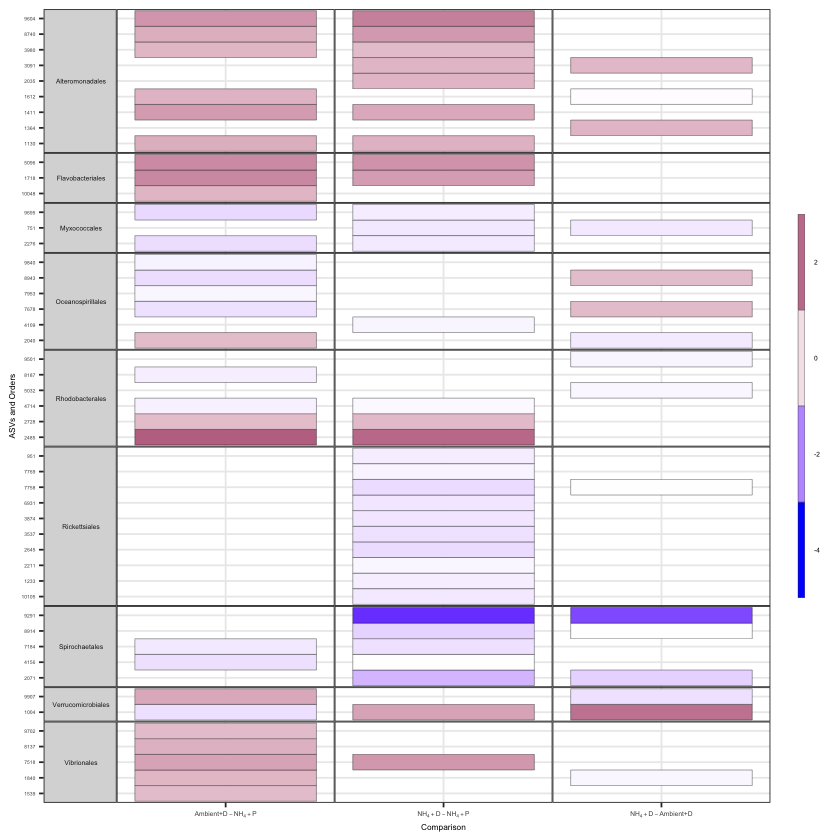

In [16]:




#Add taxonomy to global results
res_global <- output$res_global
taxa_df <- tax_table(ps_paired_fill) %>%
  as.data.frame() %>%
  rownames_to_column("taxon")

df_global <- res_global %>%
  left_join(taxa_df, by = "taxon")

# Add taxonomy to pairwise result
res_pair <- output$res_pair
df_fig_global <- res_pair %>%
  dplyr::select(taxon,
                lfc_ComboAmbient_Pathogen_ComboNH4_Placebo,
                lfc_ComboNH4_Pathogen_ComboNH4_Placebo,
                lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen,
                passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo,
                passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo,
                passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen) %>%
  left_join(taxa_df, by = "taxon") %>%
  dplyr::mutate(
    `Ambient_Pathogen - NH4_Placebo` = round(lfc_ComboAmbient_Pathogen_ComboNH4_Placebo, 2),
    `NH4_Pathogen - NH4_Placebo` = round(lfc_ComboNH4_Pathogen_ComboNH4_Placebo, 2),
    `NH4_Pathogen - Ambient_Pathogen` = round(lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen, 2),
    color = ifelse(
      passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo == 1 |
        passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo == 1 |
        passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen == 1,
      "aquamarine3", "black")
  ) %>%
  dplyr::select(taxon,
                `Ambient_Pathogen - NH4_Placebo`,
                `NH4_Pathogen - NH4_Placebo`,
                `NH4_Pathogen - Ambient_Pathogen`,
                color,
                everything()) %>%
  tidyr::pivot_longer(cols = c(`Ambient_Pathogen - NH4_Placebo`,
                                `NH4_Pathogen - NH4_Placebo`,
                                `NH4_Pathogen - Ambient_Pathogen`),
                      names_to = "Comparison",
                      values_to = "LFC") %>%
  arrange(taxon)




head(df_fig_global)



# 5. Plot
df_fig_global$Comparison <- factor(df_fig_global$Comparison,
                                   levels = c("Ambient_Pathogen - NH4_Placebo",
                                              "NH4_Pathogen - NH4_Placebo",
                                              "NH4_Pathogen - Ambient_Pathogen"))

lo <- floor(min(df_fig_global$LFC, na.rm = TRUE))
up <- ceiling(max(df_fig_global$LFC, na.rm = TRUE))
mid <- (lo + up)/2




fig_global <- df_fig_global %>%
filter(LFC < -0.5 | LFC > 0.5)  %>%
#filter (LFC!=0) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "_Placebo", "Placebo"))) %>%
ggplot(aes(x = Comparison, y = ASVs, fill = LFC)) +
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "blue", high = "#AA4A74", mid = "white",
                       na.value = "white", 
                       midpoint = mid,
                       limit = c(lo, up),
                       name = NULL) +

  #geom_text(aes(label = LFC), color = "black", size = 4) +
  #labs(x = NULL, y = NULL, title = "Log fold changes for globally significant taxa") +
  theme_bw() +
  #theme(
#plot.title = element_text(hjust = 0.5),
        #axis.text.y = element_text(color = df_fig_global %>%
         #                            dplyr::distinct(taxon, color) %>%
          #                           .$color)) +
  facet_grid(Order~Comparison, 
            space = "free" ,
             scales = "free",
             switch = "y"
            ) +
guides(fill = guide_legend(reverse = TRUE, 
                             barwidth = 0.3, 
                             barheight = 4)) +

  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
     axis.text.x = element_text(size=4),
      axis.text.y = element_text(size=3),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4), 
      strip.text.y.left = element_text(angle = 0, size=4),
      strip.text.x = element_blank(),
        panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) +
scale_x_discrete(labels = c(
  "Ambient_Pathogen - NH4_Placebo" = expression("Ambient+D" - NH[4] + P),
  "NH4_Pathogen - NH4_Placebo" = expression(NH[4] + D - NH[4] + P),
  "NH4_Pathogen - Ambient_Pathogen" = expression(NH[4] + D - "Ambient+D")
)) +
ylab("ASVs and Orders")

             
print(fig_global)

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/new_ANCOM_combo.jpg", 
      width = 4, height = 4, units = "in", dpi=300)

In [13]:
head(df_fig_global)

taxon,color,lfc_ComboAmbient_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen,passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs,Comparison,LFC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
09f2b55ea4f56193699d46368ecbff40,aquamarine3,-0.03947868,0.1798749,0.2193536,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,Ambient_Pathogen - NH4_Placebo,-0.04
09f2b55ea4f56193699d46368ecbff40,aquamarine3,-0.03947868,0.1798749,0.2193536,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - NH4_Placebo,0.18
09f2b55ea4f56193699d46368ecbff40,aquamarine3,-0.03947868,0.1798749,0.2193536,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - Ambient_Pathogen,0.22
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,-0.04838257,0.2725094,0.3208919,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,Ambient_Pathogen - NH4_Placebo,-0.05
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,-0.04838257,0.2725094,0.3208919,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - NH4_Placebo,0.27
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,-0.04838257,0.2725094,0.3208919,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - Ambient_Pathogen,0.32
